**Read the data files using library glob and combine all data as one dataframe using pandas**:



In [ ]:
# Import libraries
import glob
import pandas as pd

# Get CSV files from a folder
path =  r'C:\Users\user\Desktop\Sales Data'
files_csv = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame and list of dataframes
df_list = (pd.read_csv(file) for file in files_csv)

# Concatenate all DataFrames
data   = pd.concat(df_list)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,09/13/21 21:20,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,09/15/21 15:41,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,09/15/21 17:13,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,09/25/21 08:15,"626 Adams St, San Francisco, CA 94016"


***The shape dataset***

In [ ]:
data.shape

(368935, 6)

**Columns of Final Dataset**

In [ ]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

**Cleaning the data:**

1.   **find data Null and Dropping Null Values**



In [ ]:
data.isnull().sum()

Order ID            1078
Product             1078
Quantity Ordered    1078
Price Each          1078
Order Date          1078
Purchase Address    1078
dtype: int64

**Use dropna() method for remove data null**

In [ ]:
df= data.dropna()
df.shape

(367857, 6)

2.   **Removing Junk Data**

we observed that there are 355 columns in which values in rows are the same as the header. so making a new data frame where these values will be excluded.

In [ ]:
df = df[df["Product"].str.contains("Product") == False]
df.shape

(367210, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367210 entries, 0 to 17120
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          367210 non-null  object
 1   Product           367210 non-null  object
 2   Quantity Ordered  367210 non-null  object
 3   Price Each        367210 non-null  object
 4   Order Date        367210 non-null  object
 5   Purchase Address  367210 non-null  object
dtypes: object(6)
memory usage: 19.6+ MB


**Convert dataType "object" such as (Order ID, Quantity Ordered, Price Each) to "float", and dataType for (Order Date) to "date"**


In [ ]:
df["Price Each"] = pd.to_numeric(df["Price Each"], downcast="float")
df['Order Date'] =  pd.to_datetime(df['Order Date'])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast="float")
df["Order ID"] = pd.to_numeric(df["Order ID"], downcast="float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367210 entries, 0 to 17120
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          367210 non-null  float32       
 1   Product           367210 non-null  object        
 2   Quantity Ordered  367210 non-null  float32       
 3   Price Each        367210 non-null  float32       
 4   Order Date        367210 non-null  datetime64[ns]
 5   Purchase Address  367210 non-null  object        
dtypes: datetime64[ns](1), float32(3), object(2)
memory usage: 15.4+ MB


**Describe numerical data**

    descriptive analysis techniques.

In [ ]:
df['Quantity Ordered'].describe()

count    367210.000000
mean          1.126443
std           0.446176
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64

In [ ]:
df['Price Each'].describe()

count    367210.000000
mean        185.428024
std         334.647858
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

**find Outliers in cloumns Price Each**

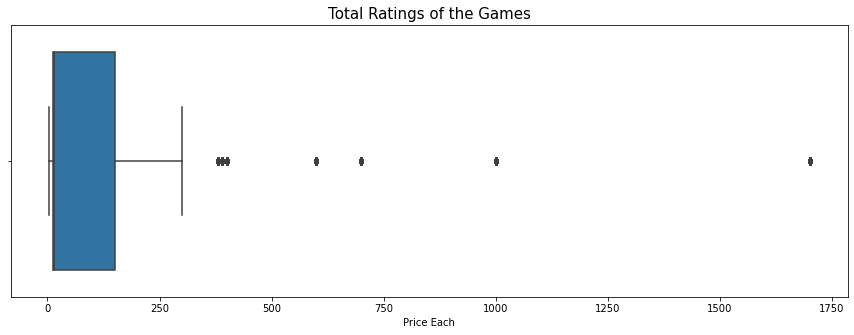

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,5))
sns.boxplot(data = df, x ='Price Each')
plt.title('Total Ratings of the Games', fontsize = 15)
plt.show()

**Create three new columns**:

1.   total price (Price Each*Quantity Ordered)
2.   Extract the hours,month and year from the Order Date column
3.   Extract the city from the Purchase Address column


In [ ]:
df['Total Price']= df['Quantity Ordered']*df["Price Each"]
df["month"]= df["Order Date"].dt.month
df["hours"]= df["Order Date"].dt.hour
df['date'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
def get_city (add): 
    return add.split(",")[1]
def get_state(add): 
    return add.split(",")[2].split(" ")[1]

df['city']= df['Purchase Address'].apply(lambda x : get_city(x) +" "+ get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,month,hours,date,city
0,171654.0,USB-C Charging Cable,1.0,11.950000,2020-04-22 22:27:00,"784 Pine St, Los Angeles, CA 90001",11.950000,4,22,2020-04,Los Angeles CA
1,171655.0,Wired Headphones,2.0,11.990000,2020-04-02 15:14:00,"513 North St, Boston, MA 02215",23.980000,4,15,2020-04,Boston MA
2,171656.0,Bose SoundSport Headphones,1.0,99.989998,2020-04-30 20:09:00,"480 Maple St, Los Angeles, CA 90001",99.989998,4,20,2020-04,Los Angeles CA
3,171657.0,Wired Headphones,1.0,11.990000,2020-04-05 00:23:00,"5 Pine St, San Francisco, CA 94016",11.990000,4,0,2020-04,San Francisco CA
4,171658.0,AAA Batteries (4-pack),2.0,2.990000,2020-04-07 10:36:00,"95 Lake St, New York City, NY 10001",5.980000,4,10,2020-04,New York City NY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367210 entries, 0 to 17120
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          367210 non-null  float32       
 1   Product           367210 non-null  object        
 2   Quantity Ordered  367210 non-null  float32       
 3   Price Each        367210 non-null  float32       
 4   Order Date        367210 non-null  datetime64[ns]
 5   Purchase Address  367210 non-null  object        
 6   Total Price       367210 non-null  float32       
 7   month             367210 non-null  int64         
 8   hours             367210 non-null  int64         
 9   date              367210 non-null  period[M]     
 10  city              367210 non-null  object        
dtypes: datetime64[ns](1), float32(4), int64(2), object(3), period[M](1)
memory usage: 28.0+ MB


**Extract Unique Product and Unique City**

In [ ]:
print(pd.unique(df['city']))
print(pd.unique(df['Product']))

[' Los Angeles CA' ' Boston MA' ' San Francisco CA' ' New York City NY'
 ' Dallas TX' ' Austin TX' ' Seattle WA' ' Portland OR' ' Atlanta GA'
 ' Portland ME']
['USB-C Charging Cable' 'Wired Headphones' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' '20in Monitor' 'iPhone' 'Macbook Pro Laptop'
 'Apple Airpods Headphones' '34in Ultrawide Monitor'
 'AA Batteries (4-pack)' 'Lightning Charging Cable' 'ThinkPad Laptop'
 'Flatscreen TV' 'Google Phone' '27in 4K Gaming Monitor' 'LG Dryer'
 '27in FHD Monitor' 'Vareebadd Phone' 'LG Washing Machine']


**data analysis:**

**Q1. What products sold the most?**  

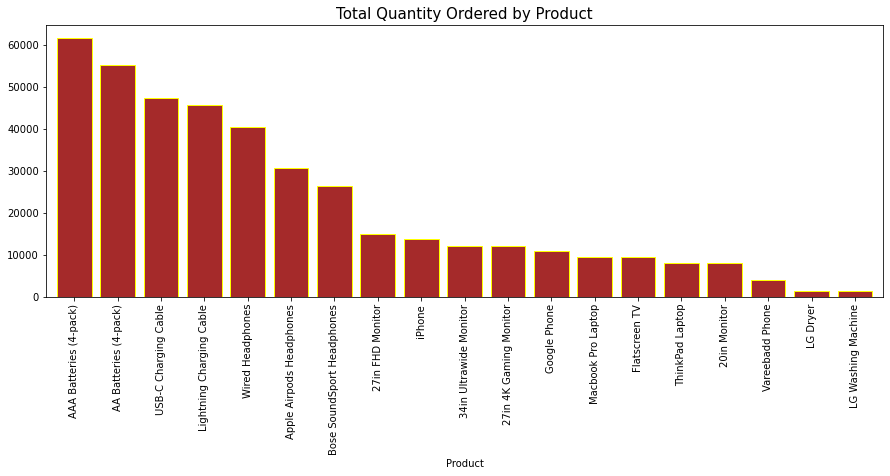

In [ ]:
total_ratings_by_category = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
total_ratings_by_category


plt.figure(figsize = (15,5))
total_ratings_by_category.plot(kind = "bar", width = 0.8, color = 'brown', edgecolor = 'yellow')
plt.title('Total Quantity Ordered by Product', fontsize = 15)

plt.show()

**Answer Q1:**

---



-   AAA Batteries (4-pack) Most sold product, and LG Washing Machine Most less product.

**Q2**.   **What is the month with the highest Total Price in the years?**


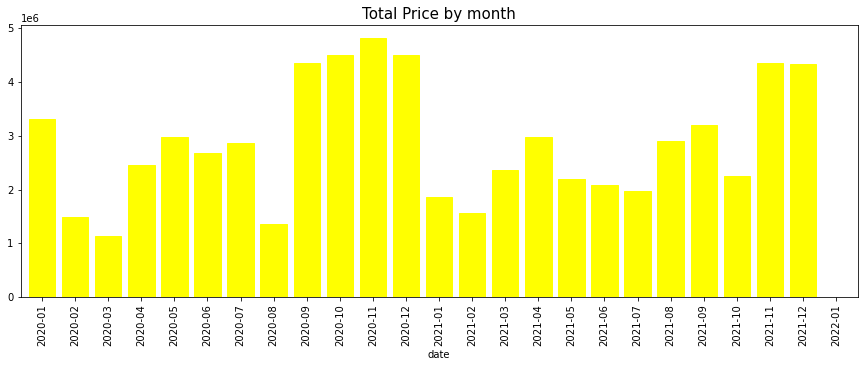

In [ ]:
total_ratings_by_category = df.groupby('date')['Total Price'].sum()
total_ratings_by_category


plt.figure(figsize = (15,5))
total_ratings_by_category.plot(kind = "bar", width = 0.8, color = 'yellow', edgecolor = 'yellow')
plt.title('Total Price by month', fontsize = 15)

plt.show()

**Answer Q2:**
- The month of 11 and 10, 12 achieved the highest Total Price of the years
- The month 2 and 3 achieved the fewer Total Price of the year





**Q3 What is the total price of each product?**

In [ ]:
prod_sales = pd.DataFrame(df.groupby('Product').sum()['Total Price'])
prod_sales.sort_values(by=['Total Price'], inplace=True, ascending=False)

#Calculating Top 10:
top_prods = prod_sales.head(10)
top_prods

,Total Price
Product,
Macbook Pro Laptop,16194200.00
iPhone,9634800.00
ThinkPad Laptop,8160918.50
Google Phone,6550200.00
27in 4K Gaming Monitor,4700549.50
34in Ultrawide Monitor,4630938.00
Apple Airpods Headphones,4615650.00
Flatscreen TV,2854500.00
Bose SoundSport Headphones,2652334.75


**Answer Q3:**

---



-    The product Macbook Pro Laptop achieved the highest prices among the products
-    The 27in FHD Monitor product also achieved the lowest price among the products




**Q4 What is the total Quantity Ordered for each city?**

In [ ]:
prod_sales = pd.DataFrame(df.groupby('city').sum()['Quantity Ordered'])
prod_sales.sort_values(by=['Quantity Ordered'], inplace=True, ascending=False)

#Calculating Top 10:
top_prods = prod_sales.head(10)
top_prods

,Quantity Ordered
city,
San Francisco CA,99744.0
Los Angeles CA,66474.0
New York City NY,55078.0
Boston MA,43967.0
Atlanta GA,33077.0
Seattle WA,33009.0
Dallas TX,32815.0
Portland OR,22007.0
Austin TX,21924.0


**Answer Q4:**

---


- San Francisco CA and Los Angeles CA are the cities in most orders for products


- Austin TX and Portland ME are the cities in the least orders for products

**Q5 Which city had the highest number of Total Price?**

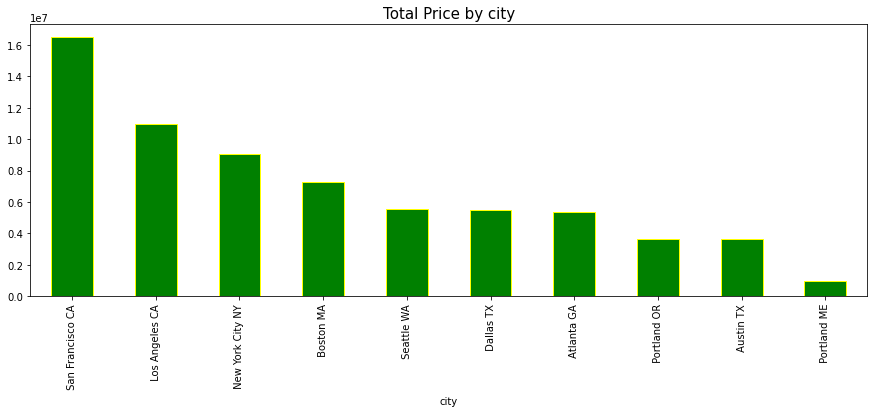

In [ ]:
total_ratings_by_category = df.groupby('city')['Total Price'].sum().sort_values(ascending = False)
total_ratings_by_category


plt.figure(figsize = (15,5))
total_ratings_by_category.plot(kind = "bar", width = 0.5, color = 'green', edgecolor = 'yellow')
plt.title('Total Price by city', fontsize = 15)

plt.show()

**Answer Q5:**

---


- San Francisco and Los Angeles CA have the highest sales Total Price 

- Austin TX and Portland ME have the least sales Total Price 

**Q6 What is the most popular time to buy?**

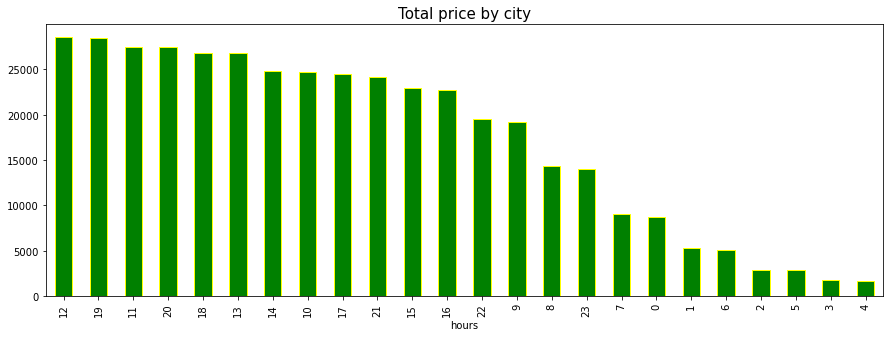

In [ ]:
total_ratings_by_category = df.groupby('hours')['Quantity Ordered'].sum().sort_values(ascending = False)
total_ratings_by_category


plt.figure(figsize = (15,5))
total_ratings_by_category.plot(kind = "bar", width = 0.5, color = 'green', edgecolor = 'yellow')
plt.title('Total price by city', fontsize = 15)

plt.show()

**Answer Q6:**

---


- Products are bought at 12 and 19 o'clock mostly
- The figure shows that in the late hours of the night and in the morning hours, sales are less.

**Q7**.   **What is the month with the highest Quantity Ordered in the years?**


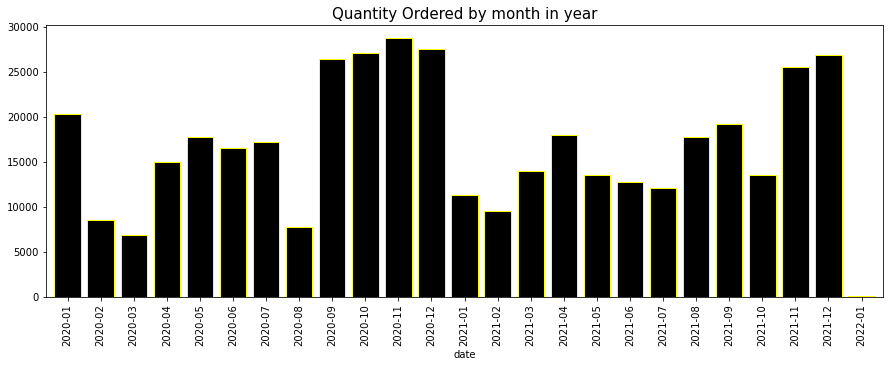

In [ ]:
total_ratings = df.groupby('date')['Quantity Ordered'].sum()
total_ratings


plt.figure(figsize = (15,5))
total_ratings.plot(kind = "bar", width = 0.8, color = 'black', edgecolor = 'yellow')
plt.title('Quantity Ordered by month in year', fontsize = 15)

plt.show()

**Answer Q7:**
- The month of 11 and 10, 12 achieved the highest Quantity Ordered of the years
- The month 2 and 3 achieved the fewer Quantity Ordered of the years

**Q8 What is it Average monthly sales and the Last 12 months?**

In [ ]:
avg_monthly_sales = dataset['Total Price'].mean()
print(f"Overall average monthly Price: ${avg_monthly_sales}")

avg_monthly_sales_12month = dataset['Total Price'][-12:].mean()
print(f"Last 12 months average monthly Price: ${avg_monthly_sales_12month}")

Overall average monthly Price: $186.50051879882812
Last 12 months average monthly Price: $205.3199920654297


**Q9 what Duration of a dataset in years and days?**

In [ ]:
def sales_duration(data):
    data.date = pd.to_datetime(data.date)
    number_of_days = data.date.max() - data.date.min()
    number_of_years = number_of_days.days / 365
    print(number_of_days.days, 'days')
    print(number_of_years, 'years')
    
sales_duration(dataset)

731 days
2.0027397260273974 years


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Linear Regression**

**Correlation**

In [ ]:
df.corr()

,Order ID,Quantity Ordered,Price Each,Total Price,month,hours
Order ID,1.000000,0.001949,0.000724,0.000709,0.978539,-0.000190
Quantity Ordered,0.001949,1.000000,-0.149402,-0.140554,0.001437,0.000825
Price Each,0.000724,-0.149402,1.000000,0.999212,0.000702,-0.000901
Total Price,0.000709,-0.140554,0.999212,1.000000,0.000682,-0.000947
month,0.978539,0.001437,0.000702,0.000682,1.000000,0.000297
hours,-0.000190,0.000825,-0.000901,-0.000947,0.000297,1.000000




1.  **Correlation between Order ID and month 0.97 which is very high**.

2.   **Correlation between Price Each and Quantity Ordered is -0.149402	 which is lowest one.**




**Data Visualisation: month vs Order ID**

<AxesSubplot:xlabel='month', ylabel='Order ID'>

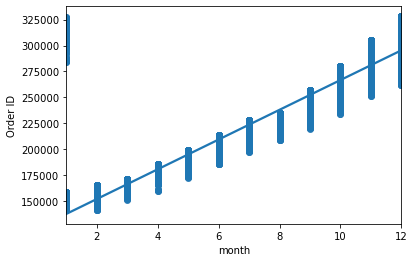

In [ ]:
sns.regplot(x='month', y='Order ID', data=df)

**Data Visualisation: Total Price vs Price Each**

<AxesSubplot:xlabel='Total Price', ylabel='Price Each'>

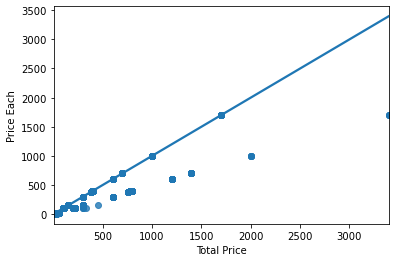

In [ ]:
sns.regplot(x='Total Price', y='Price Each', data=df)

In [ ]:
#importing required Library 

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels

import statsmodels.api as sm

import sklearn

from sklearn.model_selection import train_test_split

**Create X and y**

 **Create Train and Test sets**

In [ ]:
X=df['month']

y=df['Order ID']

X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.70, random_state=100)

**Training the model on training set (i.e. learn the coefficient) Using StatsModels**

In [ ]:
X_train_sm=sm.add_constant(X_train)

X_train_sm.head()


lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.params

const    123340.487648
month     14330.541656
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Order ID   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.812e+06
Date:                Sat, 23 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:28:19   Log-Likelihood:            -2.7467e+06
No. Observations:              257046   AIC:                         5.493e+06
Df Residuals:                  257044   BIC:                         5.494e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.233e+05     48.762   2529.452      0.000    1.23e+05    1.23e+05
month       1.433e+04      5.944   2410.873      0.000    1.43e+04    1.43e+04
==============================================================================
Omnibus:                   118776.787   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3107882.520
Skew:                           1.667   Prob(JB):                         0.00
Kurtosis:                      19.705   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ٌ**Result:**

The month has a positive and statistically significant effect on the order, and this result means that by changing the month by one unit, the order will increase by 14330. It is also found that the Durbin-Watson test reached 2.004 and this value indicates that the model does not contain autocorrelation problems. The Prob(F-statistic) was 0.00 and less than 0.05, which means that the model is statistically significant.



In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,month,hours,city,date
0,171654.0,USB-C Charging Cable,1.0,11.950000,2020-04-22 22:27:00,"784 Pine St, Los Angeles, CA 90001",11.950000,4,22,Los Angeles CA,2020-04-22
1,171655.0,Wired Headphones,2.0,11.990000,2020-04-02 15:14:00,"513 North St, Boston, MA 02215",23.980000,4,15,Boston MA,2020-04-02
2,171656.0,Bose SoundSport Headphones,1.0,99.989998,2020-04-30 20:09:00,"480 Maple St, Los Angeles, CA 90001",99.989998,4,20,Los Angeles CA,2020-04-30
3,171657.0,Wired Headphones,1.0,11.990000,2020-04-05 00:23:00,"5 Pine St, San Francisco, CA 94016",11.990000,4,0,San Francisco CA,2020-04-05
4,171658.0,AAA Batteries (4-pack),2.0,2.990000,2020-04-07 10:36:00,"95 Lake St, New York City, NY 10001",5.980000,4,10,New York City NY,2020-04-07
...,...,...,...,...,...,...,...,...,...,...,...
17116,250343.0,Wired Headphones,1.0,11.990000,2021-09-13 21:20:00,"981 West St, San Francisco, CA 94016",11.990000,9,21,San Francisco CA,2021-09-13
17117,250344.0,Bose SoundSport Headphones,1.0,99.989998,2021-09-15 15:41:00,"16 Highland St, Los Angeles, CA 90001",99.989998,9,15,Los Angeles CA,2021-09-15
17118,250345.0,AAA Batteries (4-pack),3.0,2.990000,2021-09-15 17:13:00,"630 South St, Los Angeles, CA 90001",8.970000,9,17,Los Angeles CA,2021-09-15
17119,250346.0,Wired Headphones,1.0,11.990000,2021-09-25 08:15:00,"626 Adams St, San Francisco, CA 94016",11.990000,9,8,San Francisco CA,2021-09-25





**Price Forecasting**

In [ ]:
dataset = df[['date','Total Price']]
dataset

,date,Total Price
0,2020-04-22,11.950000
1,2020-04-02,23.980000
2,2020-04-30,99.989998
3,2020-04-05,11.990000
4,2020-04-07,5.980000
...,...,...
17116,2021-09-13,11.990000
17117,2021-09-15,99.989998
17118,2021-09-15,8.970000
17119,2021-09-25,11.990000


**plot Monthly Peice** 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


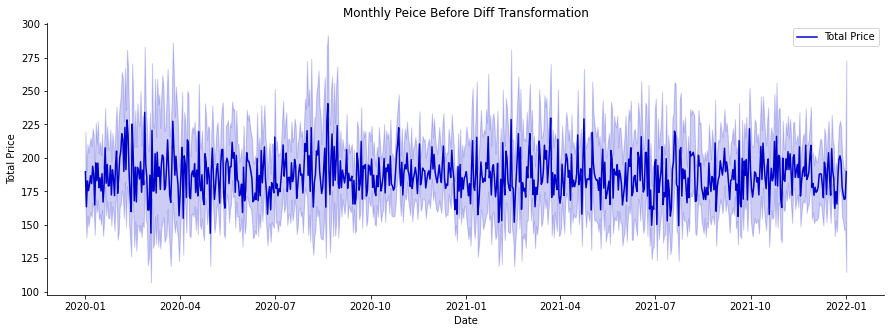

In [ ]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Total Price')
    
    second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
    second.date = pd.to_datetime(second.date, format='%Y')
    
    ax.set(xlabel = "Date",
           ylabel = "Total Price",
           title = title)
    
    sns.despine()
time_plot(dataset, 'date', 'Total Price', 'Monthly Peice Before Diff Transformation')

**Preparing Dataset Modeling:**


**Regressive Modeling:**
     -pandas Function dataframe.shift() Shift the index by the desired number of periods with an optional time frequency. This function takes a scalar parameter period, which represents the number of shifts along the desired axis. This function is very useful when working with time-series data.

    
        

In [ ]:
def get_diff(data):
    data['Price_diff'] = data['Total Price'].diff()
    data = data.dropna()
    return data
stationary_df = get_diff(dataset)

<ipython-input-40-06e98165b411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_diff'] = data['Total Price'].diff()


In [ ]:
stationary_df

,date,Total Price,Price_diff
1,2020-04-02,23.980000,12.030000
2,2020-04-30,99.989998,76.009995
3,2020-04-05,11.990000,-88.000000
4,2020-04-07,5.980000,-6.010000
5,2020-04-18,99.989998,94.009995
...,...,...,...
17116,2021-09-13,11.990000,-588.010010
17117,2021-09-15,99.989998,88.000000
17118,2021-09-15,8.970000,-91.019997
17119,2021-09-25,11.990000,3.020000


**create dataframe for transformation from time series to supervised**

In [ ]:
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['Price_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
        
    return supervised_df
model_df = generate_supervised(stationary_df)
model_df

,date,Total Price,Price_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2020-04-09,5.980000,-144.020004,0.000000,-1550.000000,1688.040039,-688.039978,590.010010,98.000000,-88.000000,94.009995,-6.010000,-88.000000,76.009995,12.030000
1,2020-04-13,109.989998,104.009995,-144.020004,0.000000,-1550.000000,1688.040039,-688.039978,590.010010,98.000000,-88.000000,94.009995,-6.010000,-88.000000,76.009995
2,2020-04-01,1700.000000,1590.010010,104.009995,-144.020004,0.000000,-1550.000000,1688.040039,-688.039978,590.010010,98.000000,-88.000000,94.009995,-6.010000,-88.000000
3,2020-04-30,379.989990,-1320.010010,1590.010010,104.009995,-144.020004,0.000000,-1550.000000,1688.040039,-688.039978,590.010010,98.000000,-88.000000,94.009995,-6.010000
4,2020-04-14,5.980000,-374.009979,-1320.010010,1590.010010,104.009995,-144.020004,0.000000,-1550.000000,1688.040039,-688.039978,590.010010,98.000000,-88.000000,94.009995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367192,2021-09-13,11.990000,-588.010010,576.020020,-576.020020,588.010010,-2.960000,-365.039978,-220.010010,585.049988,-365.039978,280.000000,-50.010002,146.160004,0.000000
367193,2021-09-15,99.989998,88.000000,-588.010010,576.020020,-576.020020,588.010010,-2.960000,-365.039978,-220.010010,585.049988,-365.039978,280.000000,-50.010002,146.160004
367194,2021-09-15,8.970000,-91.019997,88.000000,-588.010010,576.020020,-576.020020,588.010010,-2.960000,-365.039978,-220.010010,585.049988,-365.039978,280.000000,-50.010002
367195,2021-09-25,11.990000,3.020000,-91.019997,88.000000,-588.010010,576.020020,-576.020020,588.010010,-2.960000,-365.039978,-220.010010,585.049988,-365.039978,280.000000


**Split data train and test**

In [ ]:
def tts(data):
    data = data.drop(['Total Price','date'],axis=1)
    train, test = data[0:-99].values, data[-99:].values
    
    return train, test

train, test = tts(model_df)

In [ ]:
train.shape

(367098, 13)

**apply Min Max Scaler and reshape training set and testing set**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def scale_data(train_set, test_set):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
X_train.shape

(367098, 12)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import pickle

1.   **function_1: reshape y_pred and rebuild test set for inverse transform**
2.   **function_2: load in original dataframe without scaling applied**
3.   **function_3: create dataframe that shows the predicted sales**
4.   **function_4: predict**
5.   **function_5: get scores(RMSE,MAE,R2 Score)**
6.   **function_6: plot results**
7.   **function_7: run model** 



In [ ]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):  
    
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
    
    
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))
        
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted
def load_original_df():
    #
    dataset.date = dataset.date.apply(lambda x: str(x)[:-3])
    original_df = dataset.groupby('date')['Total Price'].sum().reset_index()
    original_df.date = pd.to_datetime(original_df.date)
    return original_df
def predict_df(unscaled_predictions, original_df):
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-100:].date)
    act_sales = list(original_df[-100:]['Total Price'])
    
    for index in range(0,len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)
        
    df_result = pd.DataFrame(result_list)
    
    return df_result
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df['Total Price'][-99:], unscaled_df.pred_value[-99:]))
    mae = mean_absolute_error(original_df['Total Price'][-99:], unscaled_df.pred_value[-99:])
    r2 = r2_score(original_df['Total Price'][-99:], unscaled_df.pred_value[-99:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(original_df.date, original_df['Total Price'], data=original_df, ax=ax, 
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, 
                 label='Predicted', color='Red')
    
    ax.set(xlabel = "Date",
           ylabel = "Total Price",
           title = f"{model_name} Price Forecasting Prediction")
    
    ax.legend()
    
    sns.despine()
    
def run_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
      
    get_scores(unscaled_df, original_df, model_name)
    
    plot_results(unscaled_df, original_df, model_name)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

RMSE: 18832.886920340818
MAE: 11074.518771701389
R2 Score: 0.7039713305695932


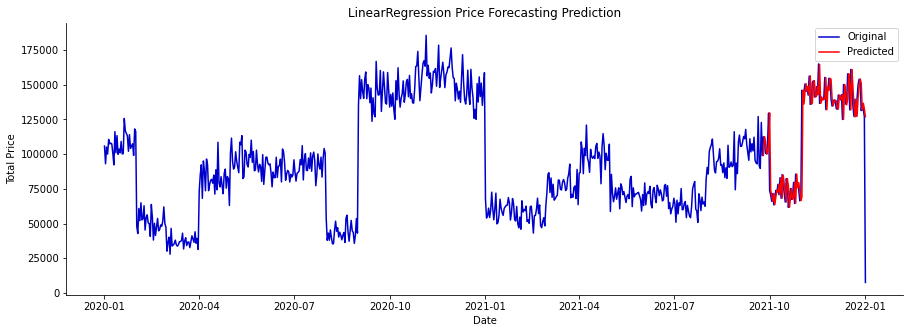

In [ ]:
run_model(train, test, LinearRegression(), 'LinearRegression')